In [13]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics

In [7]:
sub_df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data_subset.csv')

Select & split the data

In [8]:
data = sub_df[['identity_score', 'gap_ratio', 'N/aln_len', 'pair_type', 'len']].reset_index(drop=True)

X = data[['identity_score', 'gap_ratio', 'N/aln_len', 'len']]
y = (data['pair_type'] == 'tobamo-tobamo').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Standardizing the features

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train the model

In [9]:
model = SVC(kernel='linear', C=0.1)
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Plot classification boundaries

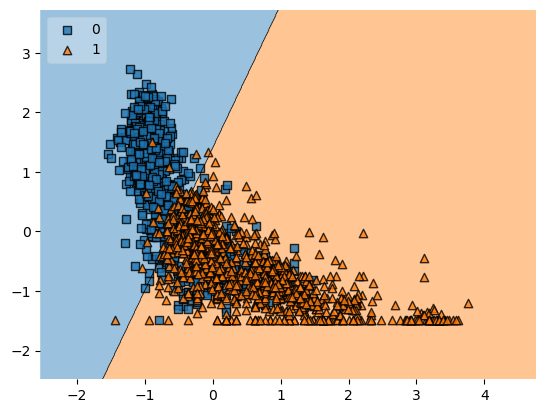

In [21]:
model_2a = SVC(C=0.1, kernel='linear')
model_2a.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train[:2000].values, clf=model_2a, legend=2)
plt.show()

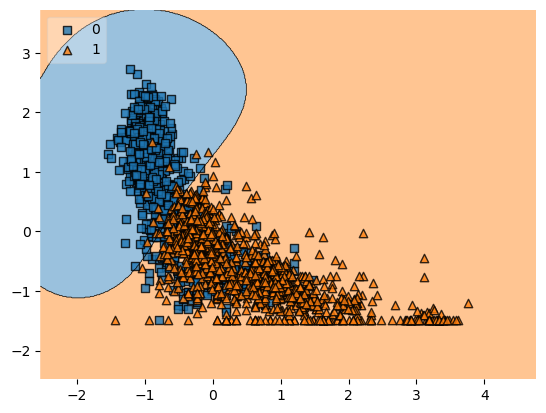

In [22]:
model_2b = SVC(C=0.1, kernel='rbf')
model_2b.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train[:2000].values, clf=model_2b, legend=2)
plt.show()

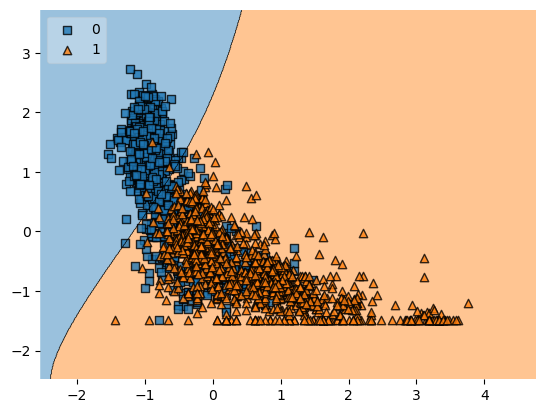

In [23]:
model_2c = SVC(C=0.1, kernel='poly')
model_2c.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train[:2000].values, clf=model_2c, legend=2)
plt.show()

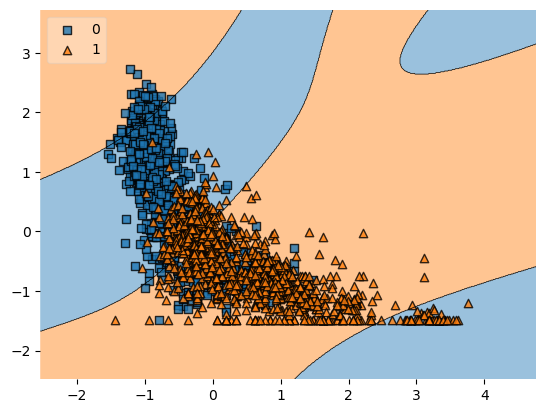

In [24]:
model_2d = SVC(C=0.1, kernel='sigmoid')
model_2d.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train[:2000].values, clf=model_2d, legend=2)
plt.show()

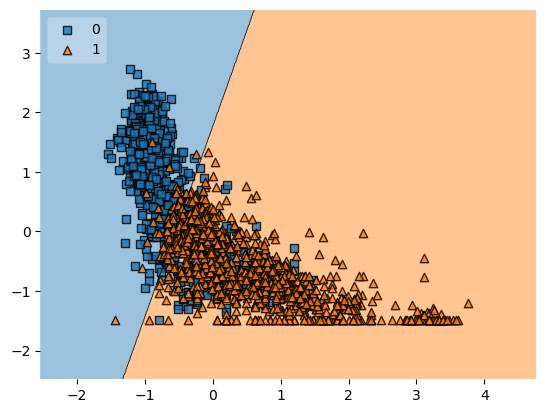

In [26]:
model_2e = SVC(C=1, kernel='linear')
model_2e.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train[:2000].values, clf=model_2e, legend=2)
plt.show()

Evaluate the model

In [27]:
model.score(X_test, y_test)

0.9493059746529873

or.

In [15]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9493059746529873

Test model on real data